# Project Outline

## Info as given in Excel
### The dataset consists of information about the purchasing behavior of 2,000 individuals from a given area when entering a physical ‘FMCG’ store. All data has been collected through the loyalty cards they use at checkout.

									
Variable	Data type	Range	Description						
ID	numerical	Integer	Shows a unique identificator of a customer.						
									
Sex	categorical	{0,1}	Biological sex (gender) of a customer. In this dataset there are only 2 different options.						
		0	male						
		1	female						
									
Marital status	categorical	{0,1}	Marital status of a customer.						
		0	single						
		1	non-single (divorced / separated / married / widowed)						
									
Age	numerical	Integer	The age of the customer in years, calculated as current year minus the year of birth of the customer at the time of creation of the dataset						
		18	Min value (the lowest age observed in the dataset)						
		76	Max value (the highest age observed in the dataset)						
									
Education	categorical	{0,1,2,3}	Level of education of the customer						
		0	other / unknown						
		1	high school						
		2	university						
		3	graduate school						
									
Income	numerical	Real	Self-reported annual income in US dollars of the customer.						
		35832	Min value (the lowest income observed in the dataset)						
		309364	Max value (the highest income observed in the dataset)						
									
Occupation	categorical	{0,1,2}	Category of occupation of the customer.						
		0	unemployed / unskilled						
		1	skilled employee / official						
		2	management / self-employed / highly qualified employee / officer						
									
Settlement size	categorical	{0,1,2}	The size of the city that the customer lives in.						
		0	small city						
		1	mid-sized city						
		2	big city						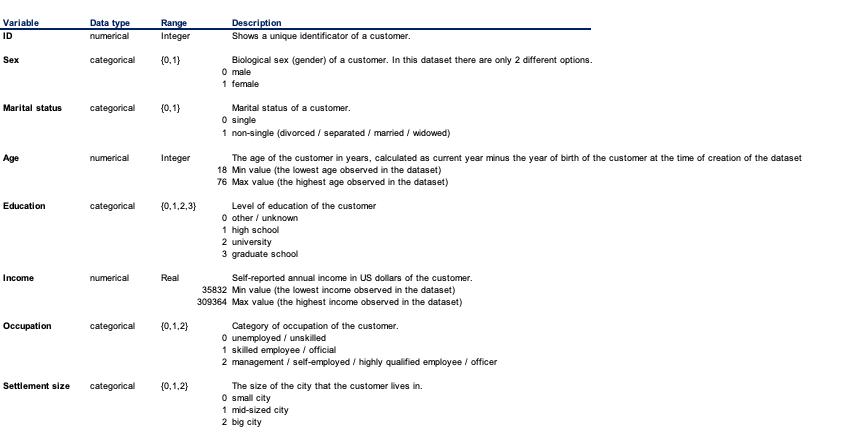

- Thanks to the above info given, the data looks more clearer.

In [1]:
#importing required libraries
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Data/segmentation_data.csv')
df.shape

(2000, 8)

In [3]:
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


### Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [5]:
df.isnull().sum()

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

We have no null fields in the data.

In [6]:
#let us drop ID column, as we dont have much use from it.

df = df.drop(['ID'], axis=1)

### Data Visualisation

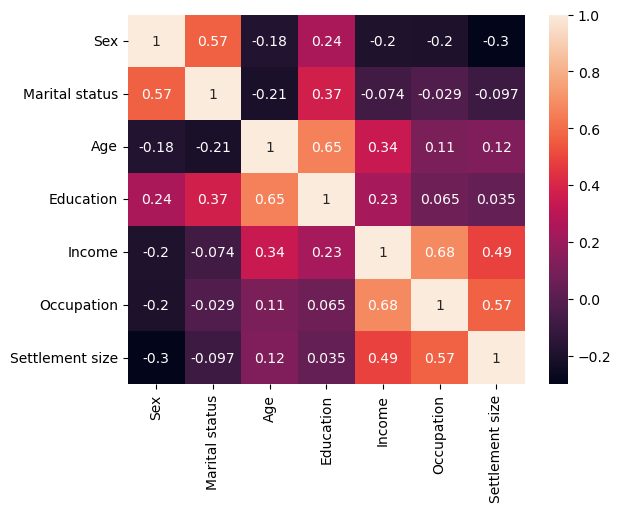

In [7]:
sns.heatmap(df.corr(), annot=True)
plt.show()

- Income, ocuupation are directly proportional to settlement size
- sex and settlement size are inversely related

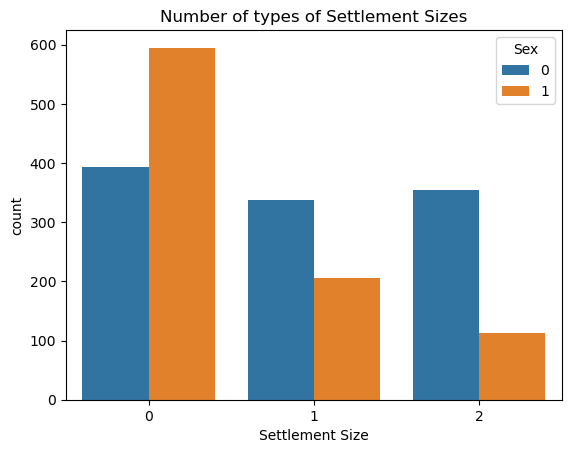

In [8]:
sns.countplot(df['Settlement size'], hue=df['Sex'])
plt.xlabel('Settlement Size')
plt.title('Number of types of Settlement Sizes')
plt.show()

- So from Data we can observe, a lot more people are settled in small city and mid size city comes next, followed by big city
- And we also observe that more number of females are settled in small city and very less in Big city, but the proportion Men remains almost same.

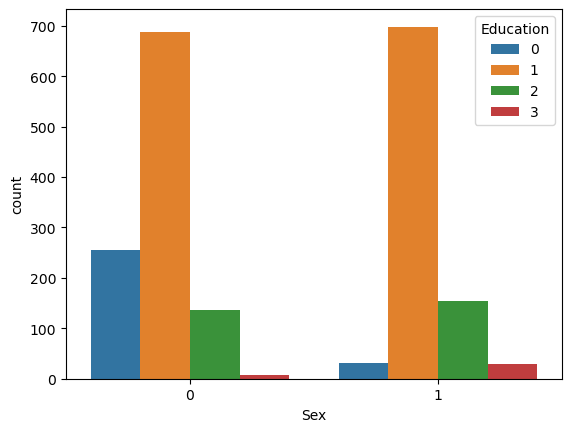

In [9]:
#let us check for Sex and Education
sns.countplot(df['Sex'], hue=df['Education'])
plt.show()

Education categorical {0,1,2,3} Level of education of the customer
0 other / unknown
1 high school
2 university
3 graduate school

- Lot of Men & Women went to High School
- Next best for women is University, which is higher than Men.

## Implementing Machine Learning Model

# K- Means Clustering

In [10]:
from sklearn.cluster import KMeans

In [11]:
x = df

In [12]:
x.columns

Index(['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation',
       'Settlement size'],
      dtype='object')

### Elbow Methd
This helps in finding right number of clusters

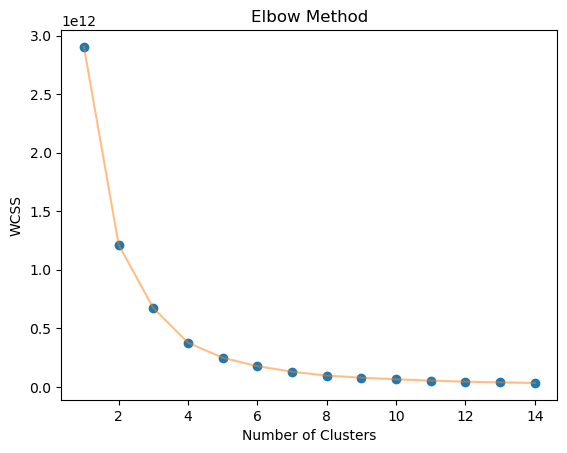

In [13]:
# finding out the proper number of clusters
wcss = []
for i in list(range(1,15)):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,15), wcss, 'o')
plt.plot(range(1 , 15) , wcss , '-' , alpha = 0.5)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.savefig('Elbow_Method.png')
plt.show()

4 number of clusters

### Scaling the Data

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaled = scaler.fit_transform(x)

In [15]:
# instantiating model
kmeans = KMeans(n_clusters=4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(scaled)

In [19]:
df_segm_kmeans= scaled.copy()
df['Segment K-means'] = kmeans.labels_

In [20]:
df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment K-means
0,0,0,67,2,124670,1,2,1
1,1,1,22,1,150773,1,2,3
2,0,0,49,1,89210,0,0,2
3,0,0,45,1,171565,1,1,1
4,0,0,53,1,149031,1,1,1


In [21]:
df['Segment K-means'].value_counts()

0    529
1    523
2    484
3    464
Name: Segment K-means, dtype: int64

In [22]:
df_segm_analysis = df.groupby(['Segment K-means']).mean()
df_segm_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segment K-means,,,,,,,
0,0.822306,1.0,32.440454,1.204159,102201.884688,0.449905,0.009452
1,0.003824,0.0,39.988528,0.824092,145341.502868,1.271511,1.518164
2,0.363636,0.0,36.661157,0.805785,100390.041322,0.351240,0.059917
3,0.648707,1.0,34.480603,1.331897,136296.670259,1.181034,1.400862


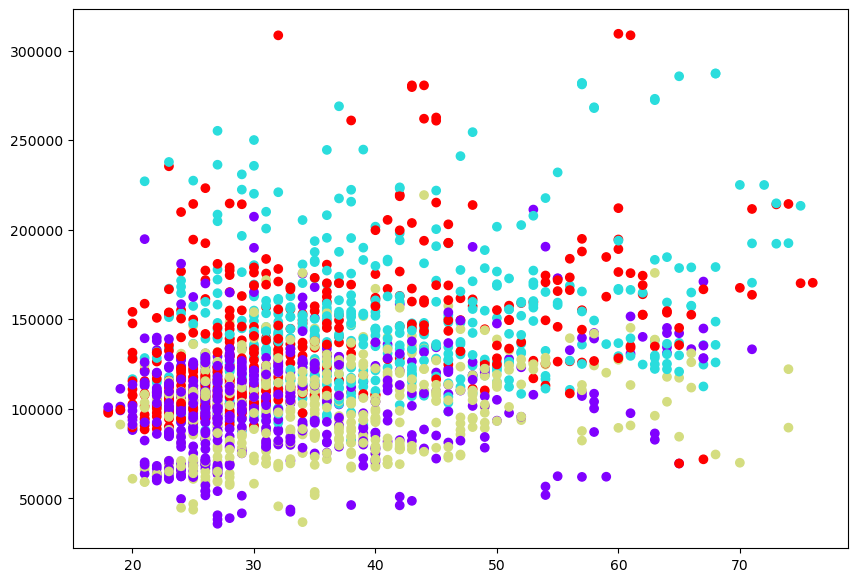

In [24]:
plt.figure(figsize=(10,7))
plt.scatter(df['Age'],df['Income'],c=kmeans.labels_,cmap='rainbow')